# 1. Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data (i.e., the data set with your new customer data from the first part of this task).

In [5]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [6]:
# file location path is defined.
path = r'C:\Users\User\02.25 Instacart Basket Analysis'

In [7]:
# The cust_ords_prods_merge_ (most up-to-date project data) DataFrame is imported
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'cust_ords_prods_merge_.pkl'))

# 2. If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

The visualizations are on a different notebook


# 3.You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
# In a markdown cell beneath your histogram, describe what the histogram demonstrates.

In [11]:
# A general overview of the DataFrame is performed to check for irregularities.
df.head()

,user_id,First Name,Last_name,Gender,State,Age,dependants,fam_status,income,order_id,...,prices,busiest_days,busiest_period_of_day,max_order,loyalty_flag,max_price,mean_price,spending_type,median_frequency,frequent_customers
0,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665,518967,...,4.3,Regularly busy,Average orders,8,New customer,7.988889,7.988889,Low spender,19.0,Regular customer
1,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665,423547,...,12.6,Regularly busy,Average orders,8,New customer,7.988889,7.988889,Low spender,19.0,Regular customer
2,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665,2524893,...,12.6,Least busy,Most orders,8,New customer,7.988889,7.988889,Low spender,19.0,Regular customer
3,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665,2524893,...,4.3,Least busy,Most orders,8,New customer,7.988889,7.988889,Low spender,19.0,Regular customer
4,26711,Deborah,Esquivel,Female,Missouri,48,3,married,165665,2524893,...,7.1,Least busy,Most orders,8,New customer,7.988889,7.988889,Low spender,19.0,Regular customer


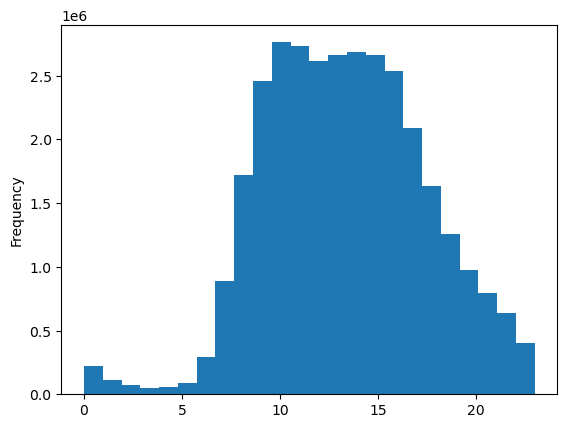

In [12]:
# a histogram of the “order_hour_of_day” column. with 24 bins for 24 hours
Hist_hour = df['order_hour_of_day'].plot.hist(bins = 24)

In [13]:
# The value_counts() function will check the frequency in the order_hour_of_day column
df['order_hour_of_day'].value_counts()

order_hour_of_day
10    2761760
11    2736140
14    2689136
15    2662144
13    2660954
12    2618532
16    2535202
9     2454203
17    2087654
8     1718118
18    1636502
19    1258305
20     976156
7      891054
21     795637
22     634225
23     402316
6      290493
0      218769
1      115700
5       87961
2       69375
4       53242
3       51281
Name: count, dtype: int64

The busiest hour is 10:00, while the least busy hour is 3:00. Most orders are placed between 8:00 and 19:00.

# 4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

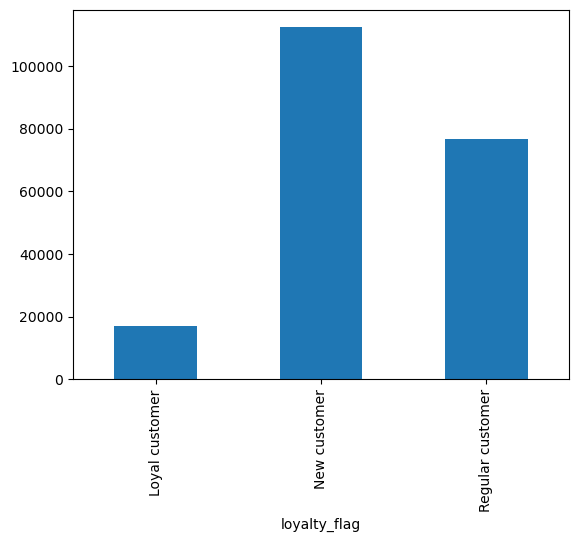

In [16]:
# Bar Chart 
Bar_loyal = df.groupby(['loyalty_flag']).user_id.nunique().plot.bar()

In [17]:
# The value_counts() function will check the frequency in the loyalty_flag column
df.groupby(['loyalty_flag']).user_id.nunique()

loyalty_flag
Loyal customer       17017
New customer        112328
Regular customer     76864
Name: user_id, dtype: int64

This bar chart shows that new customers (112,328) have the highest loyalty flag count, followed by regular customers (76,864) and loyal customers (17,017).

# 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

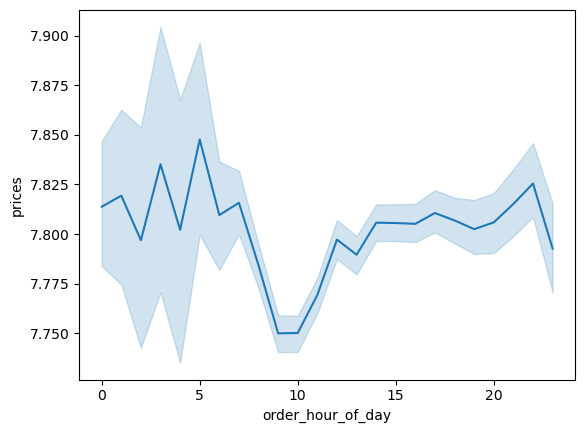

In [20]:
# The two dataframes above, big and small, are the samples  from the dataframe. 
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7
big = df[dev]
small = df[~dev]
df_2 = small[['order_hour_of_day','prices']]
Line_hour_prices = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

The line chart indicates that around 10:00, order prices are the lowest compared to all other hours.

# 6.Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
# In a markdown cell beneath your line chart, describe what the line chart shows.

In [23]:
df['dependants'].value_counts()

dependants
3    8135109
0    8097503
2    8091143
1    8081104
Name: count, dtype: int64

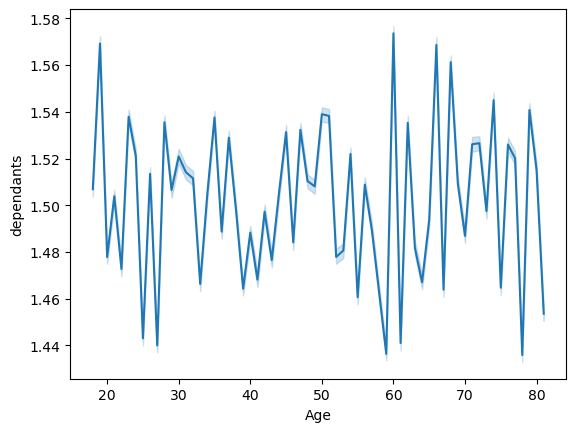

In [24]:
Line_Age_Dependants = sns.lineplot(data = df, x = 'Age',y = 'dependants')

There appears to be no clear connection between age and the number of dependants.

# 7.You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
# In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

In [27]:
df_3 = small[['Age','income']]

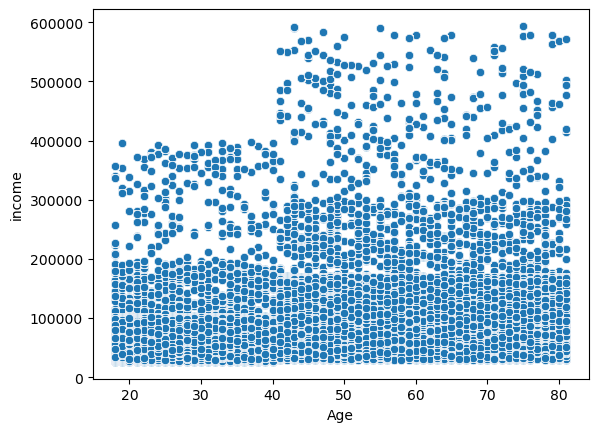

In [28]:
Scatter_Age_Income = sns.scatterplot(x = 'Age', y = 'income',data = df_3)

Customers start having an income higher than 40,000 only after the age of 40.

# 8.Export your visualizations as “.png” files in your relevant project folder.

In [31]:
# Histrogram image exported
Hist_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))

In [32]:
# Bar Chart image exported
Bar_loyal.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [33]:
# Line Chart image exported
Line_hour_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_price_hour_of_day.png'))

In [34]:
# Line Chart image exported
Line_Age_Dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_number_of_dependents.png'))

In [35]:
# Scatter plot image exported
Scatter_Age_Income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Scatter_Age_Income.png'))